# Hacktiv8 Phase 0: Milestone 1

## Introduction

Name : [Salman Faishal](https://github.com/salmanfaishal27)

Batch : 017

## Description

### Dataset

Dataset yang digunaka pada project ini adalah dataset yang berisi tentang total penjualan dalam dollar di Amerika antara tahun 2010 dan 2011, dataset ini terdiri dari 4248 baris dan 20 kolom, dataset ini dapat dilihat di [Kaggle](https://www.kaggle.com/datasets/dsfelix/us-stores-sales)
 
Keterangan kolom pada dataset ini:

- Area Code: Store's Code
- State: Store's State
- Market: Store's Region
- Market Size: Store's Size
- Profit: Profits in Dollars ($)
- Margin: Profit + Total Expenses  OR Sales - COGS 
- Sales: Values Acquired in Sales 
- COGS: Cost of Goods Sold 
- Total Expenses: Total Expenses to get the Product to Sell ($)
- Marketing: Expenses in Marketing 
- Inventory: Inventory Value of the Product in the Sale Moment ($)
- Budget Profit: Expected Profit 
- Budget COGS: Expected COGS 
- Budget Margin: Expected Profit + Expected Total Expenses  OR Expected Sales - Expected COGS 
- Budget Sales: Expected Value Acquired in Sales 
- ProductID: Product ID
- Date: Sale Date
- Product Type: Product Category
- Product: Product Description
- Type: Type

### Objective

1. market size mana yang memiliki profit paling banyak
2. mencari tahu kota mana yang memiliki total penjualan paling banyak
3. Bagaimana perbandingan jumlah produk terjual dan profit yang di dapatkan dari tiap market size
4. apakah rata-rata margin antara Small Market dan Major Market memiliki perbedaan signifikan
5. kenapa market size tersebut bisa mengalami profit lebih tinggi dibanding dengan yang lainnya
6. kapan profit tertinggi yang dihasilkan market tersebut

### Problem Statement

Seorang pengusaha ingin membuat cafe baru untuk usaha barunya, tetapi pengusaha tersebut ingin tahu kota mana yang akan dijadikan tempat cafe barunya dan produk apa yang paling banyak dibeli
sehingga dibuatkan rekomendasi untuk usaha barunya dengan metode SMART

SMART GOALS:
Membuat small market di California dengan harga produk tidak lebih dari rata rata penjualan major market

1. Spesifik:

*   WHO ? Pengusaha
*   WHAT ? Membuat small market dengan harga tidak melebihi major market


*   WHERE ? California
*   WHEN ? awal tahun 2013


*   WHY ? Membuka usaha cafe baru di California dengan produk tidak melebihi rata rata harga produk major market bisa menghasilkan profit yang tinggi

2. Measurable:

    Melakukan monitoring terhadap produk yang paling laku di California

3. Achievale:

    Dengan memperbanyak stock produk yang paling laku dan mengurangi yang kurang laku

4. Relevan: 

    small market yang dibuat di California dengan menjual produk yang paling laku di California dan mengurangi harga produk dari rata rata akan mendapatkan profit yang bagus untuk awal pembukaan  cafe

5. Time-Bound: 

    bulan januari 2013

## Working Area

### Data visualisasi

Analisis ini menggunakan aplikasi visualisasi [Tableu](https://public.tableau.com/views/USStoresSalesDashboard/Dashboard2?:language=en-US&publish=yes&:display_count=n&:origin=viz_share_link)

## Import Library

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

Mengimport library yang akan digunakan, dalam analisis ini library yang digunakan adalah `pandas`, `matplotlib`, `seaborn`, `numpy` dan `scipy`.

In [3]:
pd.set_option("display.max.columns", None)

Melakukan setting agar pandas menampilkan seluruh kolom pada dataframe.

## Data Loading

Sumber data [Kaggle](https://www.kaggle.com/datasets/dsfelix/us-stores-sales)

In [4]:
df = pd.read_csv('sales.csv')


Membuat dataframe dengan variable df yang berisi `sales.csv`

In [5]:
df.head()

,Area Code,State,Market,Market Size,Profit,Margin,Sales,COGS,Total Expenses,Marketing,Inventory,Budget Profit,Budget COGS,Budget Margin,Budget Sales,ProductId,Date,Product Type,Product,Type
0,203,Connecticut,East,Small Market,107.0,176.0,292.0,116.0,69.0,38.0,962.0,110.0,110.0,160.0,270.0,2,04/01/10 00:00:00,Coffee,Columbian,Regular
1,203,Connecticut,East,Small Market,75.0,135.0,225.0,90.0,60.0,29.0,1148.0,90.0,80.0,130.0,210.0,2,07/01/10 00:00:00,Coffee,Columbian,Regular
2,203,Connecticut,East,Small Market,122.0,195.0,325.0,130.0,73.0,42.0,1134.0,130.0,110.0,180.0,290.0,2,11/01/10 00:00:00,Coffee,Columbian,Regular
3,203,Connecticut,East,Small Market,105.0,174.0,289.0,115.0,69.0,37.0,1166.0,110.0,100.0,160.0,260.0,2,12/01/10 00:00:00,Coffee,Columbian,Regular
4,203,Connecticut,East,Small Market,104.0,135.0,223.0,90.0,56.0,29.0,1148.0,90.0,80.0,130.0,210.0,2,07/01/11 00:00:00,Coffee,Columbian,Regular


Menampilkan 5 data teratas pada dataframe

## Data Characteristic

In [6]:
df.shape

(4248, 20)

Dataframe ini memiliki 4248 baris dan 20 kolom

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4248 entries, 0 to 4247
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Area Code       4248 non-null   int64  
 1   State           4248 non-null   object 
 2   Market          4248 non-null   object 
 3   Market Size     4248 non-null   object 
 4   Profit          4248 non-null   float64
 5   Margin          4248 non-null   float64
 6   Sales           4248 non-null   float64
 7   COGS            4248 non-null   float64
 8   Total Expenses  4248 non-null   float64
 9   Marketing       4248 non-null   float64
 10  Inventory       4248 non-null   float64
 11  Budget Profit   4248 non-null   float64
 12  Budget COGS     4248 non-null   float64
 13  Budget Margin   4248 non-null   float64
 14  Budget Sales    4248 non-null   float64
 15  ProductId       4248 non-null   int64  
 16  Date            4248 non-null   object 
 17  Product Type    4248 non-null   o

Dataset ini terdiri dari:
- 11 kolom dengan tipe data float
- 2 kolom dengan tipe data int
- 7 kolom dengan tipe data object

In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Area Code,4248.0,582.278013,221.140310,203.0,417.00,573.0,772.0,985.0
Profit,4248.0,61.097693,101.708546,-638.0,17.00,40.0,92.0,778.0
Margin,4248.0,104.293315,94.342522,-302.0,52.75,76.0,132.0,613.0
Sales,4248.0,192.987524,151.133127,17.0,100.00,138.0,230.0,912.0
COGS,4248.0,84.433145,67.249769,0.0,43.00,60.0,100.0,364.0
Total Expenses,4248.0,54.063559,32.352598,10.0,33.00,46.0,65.0,190.0
Marketing,4248.0,31.185028,27.023264,0.0,13.00,22.0,39.0,156.0
Inventory,4248.0,749.381356,661.031896,-3534.0,432.00,619.0,910.5,8252.0
Budget Profit,4248.0,60.913371,79.546123,-320.0,20.00,40.0,80.0,560.0
Budget COGS,4248.0,74.830508,66.238145,0.0,30.00,50.0,90.0,450.0


Dari informasi di atas kita dapat melihat summary statistics dari kolom dataframe dengan tipe data numeric seperti rata-rata, standar deviasi, quartile, nilai minimum, dan nilai maksimum.

## Data Cleaning

### Missing Value

In [9]:
df.isna().sum()

Area Code         0
State             0
Market            0
Market Size       0
Profit            0
Margin            0
Sales             0
COGS              0
Total Expenses    0
Marketing         0
Inventory         0
Budget Profit     0
Budget COGS       0
Budget Margin     0
Budget Sales      0
ProductId         0
Date              0
Product Type      0
Product           0
Type              0
dtype: int64

dari informasi diatas dataset ini tidak memiliki missing value

## Data Preprocessing

### Column Rename

In [10]:
old_colname = list(df.columns)
new_colname = ['area_code','state','market','market_size','profit','margin','sales','cogs','total_expanses','marketing','inventory','budget_profit','budget_cogs','budget_margin','budget_sales','product_id','date','category','product_name','type']

Membuat list untuk mengganti nama kolom

In [11]:
df = df.rename(columns=dict(zip(old_colname, new_colname)))

Mengganti nama kolom dengan nama dalam list yang sudah dibuat untuk menghindari nama kolom yang mengandung space dan menjadikan nama kolom kecil semua

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4248 entries, 0 to 4247
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   area_code       4248 non-null   int64  
 1   state           4248 non-null   object 
 2   market          4248 non-null   object 
 3   market_size     4248 non-null   object 
 4   profit          4248 non-null   float64
 5   margin          4248 non-null   float64
 6   sales           4248 non-null   float64
 7   cogs            4248 non-null   float64
 8   total_expanses  4248 non-null   float64
 9   marketing       4248 non-null   float64
 10  inventory       4248 non-null   float64
 11  budget_profit   4248 non-null   float64
 12  budget_cogs     4248 non-null   float64
 13  budget_margin   4248 non-null   float64
 14  budget_sales    4248 non-null   float64
 15  product_id      4248 non-null   int64  
 16  date            4248 non-null   object 
 17  category        4248 non-null   o

nama kolom setelah dilakukan rename sudah tidak ada space dan semua menjadi huruf kecil

### Column Drop

In [13]:
data = df.drop(columns=['area_code','market'])

melakukan penghapusan pada kolom `area_code` dan `market`, karena tidak akan digunakan dalan analisis ini, dataframe yang sudah tidak memiliki kedua kolom tersebut dimasukan kedalam varabel `data`

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4248 entries, 0 to 4247
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   state           4248 non-null   object 
 1   market_size     4248 non-null   object 
 2   profit          4248 non-null   float64
 3   margin          4248 non-null   float64
 4   sales           4248 non-null   float64
 5   cogs            4248 non-null   float64
 6   total_expanses  4248 non-null   float64
 7   marketing       4248 non-null   float64
 8   inventory       4248 non-null   float64
 9   budget_profit   4248 non-null   float64
 10  budget_cogs     4248 non-null   float64
 11  budget_margin   4248 non-null   float64
 12  budget_sales    4248 non-null   float64
 13  product_id      4248 non-null   int64  
 14  date            4248 non-null   object 
 15  category        4248 non-null   object 
 16  product_name    4248 non-null   object 
 17  type            4248 non-null   o

setelah melakukan penghapusan kolom, dataset ini terdiri dari:
- 11 kolom dengan tipe data float
- 1 kolom dengan tipe data int
- 6 kolom dengan tipe data object

### Convert Data Type

In [15]:
data['date'] = pd.to_datetime(data.date)

Melakukan perbahan tipe data pada kolom date menjadi datetime

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4248 entries, 0 to 4247
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   state           4248 non-null   object        
 1   market_size     4248 non-null   object        
 2   profit          4248 non-null   float64       
 3   margin          4248 non-null   float64       
 4   sales           4248 non-null   float64       
 5   cogs            4248 non-null   float64       
 6   total_expanses  4248 non-null   float64       
 7   marketing       4248 non-null   float64       
 8   inventory       4248 non-null   float64       
 9   budget_profit   4248 non-null   float64       
 10  budget_cogs     4248 non-null   float64       
 11  budget_margin   4248 non-null   float64       
 12  budget_sales    4248 non-null   float64       
 13  product_id      4248 non-null   int64         
 14  date            4248 non-null   datetime64[ns]
 15  cate

setelah melakukan perubahan, kolom date sudah menjadi datetime yang sebelumnya adalah object

In [17]:
data.to_csv('salesclean.csv',index=False) # Export data yang sudah dilakukan preprocessing untuk digunakan di aplikasi visualisasi

## Data Exploration

In [18]:
data.date.agg(('min','max'))

min   2010-01-01
max   2011-12-01
Name: date, dtype: datetime64[ns]

dataset ini memiliki rentang waktu dari 2010-01-01 sampai 2011-12-01

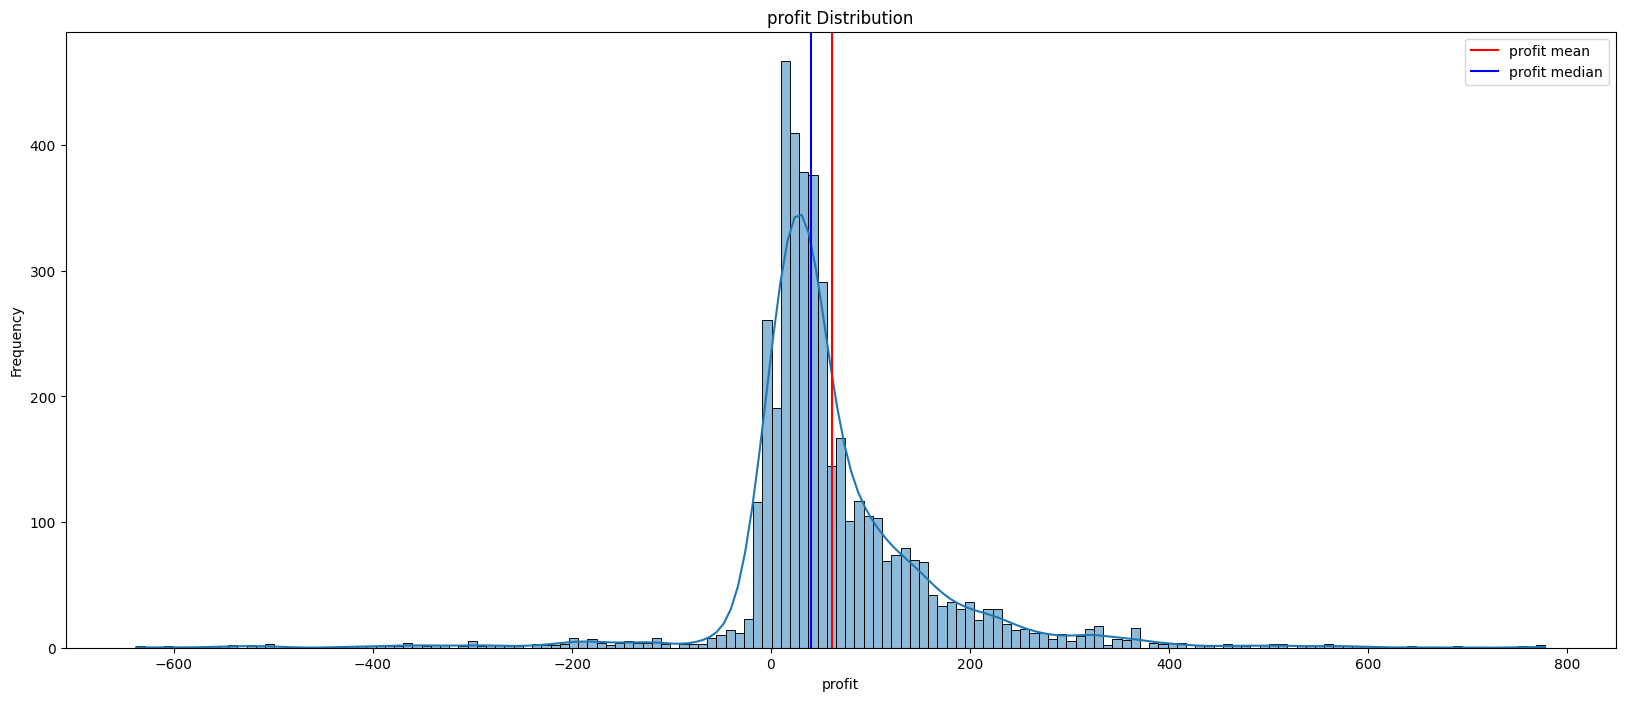

Rata rata keuntungan: 61
Median keuntungan: 40
Modus keuntungan: 47
Maksimum keuntungan: 778
Minimum keuntungan: -638


In [59]:
plt.figure(figsize=(20, 8))
sns.histplot(data=data,x='profit', kde=True)
plt.axvline(x=data.profit.mean(), color='red', label='profit mean')
plt.axvline(x=data.profit.median(), color='blue', label='profit median')
plt.title('profit Distribution')
plt.xlabel('profit')
plt.ylabel('Frequency')
plt.legend()
plt.show()
print(f'Rata rata keuntungan: {round(data.profit.mean())}')
print(f'Median keuntungan: {round(data.profit.median())}')
print(f'Modus keuntungan: {round(data.profit.mode()[0])}')
print(f'Maksimum keuntungan: {round(data.profit.max())}')
print(f'Minimum keuntungan: {round(data.profit.min())}')


Dari grafik diatas dapat dilihat distribusi data profit memiliki distribusi yang normal, dengan rata rata keuntungan sebesar 61 dollar, dan memiliki nilai tengah sebesar 40 dollar.
market ini memiliki keuntungan terbesar sebesar 778 dollar namun market terdapat juga market yang masih merugi dengan nilai kerugian terbanyak sebesar -638 dollar

In [74]:
data.groupby('market_size').profit.sum()

market_size
Major Market    155736.0
Small Market    103807.0
Name: profit, dtype: float64

In [77]:
data.groupby('market_size').profit.mean()

market_size
Major Market    91.394366
Small Market    40.804638
Name: profit, dtype: float64

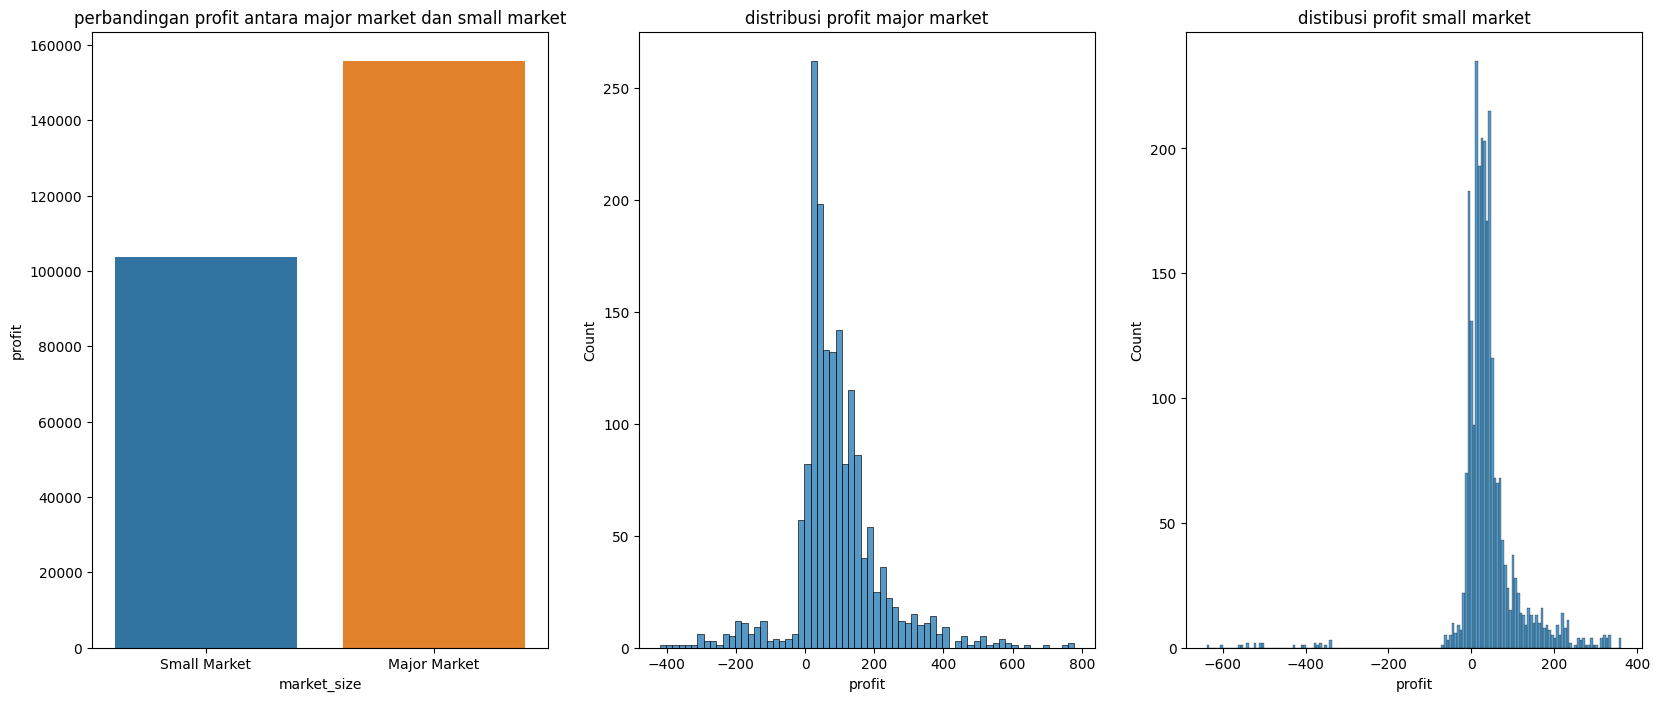

In [76]:
plt.figure(figsize=(20, 8))
plt.subplot(1,3,1)
sns.barplot(data=data, x='market_size', y='profit', estimator='sum', errorbar=None)
plt.title('perbandingan profit antara major market dan small market')
plt.subplot(1,3,2)
sns.histplot(data=data[data.market_size == 'Major Market'],x='profit')
plt.title('distribusi profit major market')
plt.subplot(1,3,3)
sns.histplot(data=data[data.market_size == 'Small Market'],x='profit')
plt.title('distibusi profit small market')
plt.show()

dari grafik diatas dapat dilihat major market memiliki pendapatan lebih besar dibandingkan small market dengan total pendapatan 155736 dan rata-rata 91, sedangkan small market memiliki total pendapatan 103807 dan rata-rata 40 dimana major market memiliki rata-rata pendapatan sekitar 50 % lebih besar dari small market, dari kedua histogram tersebut dapat diketahui distribusi profit dari kedua market size memliki distribusi yang sama yaitu normal distribution, Small market memiliki keuntungan tidak lebih dari 400 dollar namun pada small market terdapat store yang memiliki kerugian lebih dari -600 dollar dan sedangkan pada major market memiliki keuntungan yang hampir menyentuh 800 dollan namun memiliki kerugian tidak lebih -450 dollar

In [85]:
data.groupby(data.state).sales.sum().sort_values(ascending = False)

state
California       96892.0
New York         70852.0
Illinois         69883.0
Nevada           60159.0
Iowa             54750.0
Colorado         48179.0
Oregon           40899.0
Washington       38930.0
Florida          37443.0
Texas            37410.0
Utah             35384.0
Ohio             34517.0
Wisconsin        33069.0
Massachusetts    29965.0
Oklahoma         27463.0
Connecticut      25429.0
Missouri         24647.0
Louisiana        23161.0
New Mexico       15892.0
New Hampshire    14887.0
Name: sales, dtype: float64

In [96]:
data[data.state == 'California'].groupby(['product_name','category']).sales.sum().sort_values(ascending = False)

product_name       category  
Columbian          Coffee        18245.0
Decaf Espresso     Espresso      14607.0
Lemon              Herbal Tea    12681.0
Caffe Latte        Espresso      12001.0
Caffe Mocha        Espresso       7691.0
Darjeeling         Tea            6507.0
Chamomile          Herbal Tea     6233.0
Earl Grey          Tea            4640.0
Green Tea          Tea            4027.0
Mint               Herbal Tea     3807.0
Decaf Irish Cream  Coffee         3739.0
Amaretto           Coffee         2714.0
Name: sales, dtype: float64

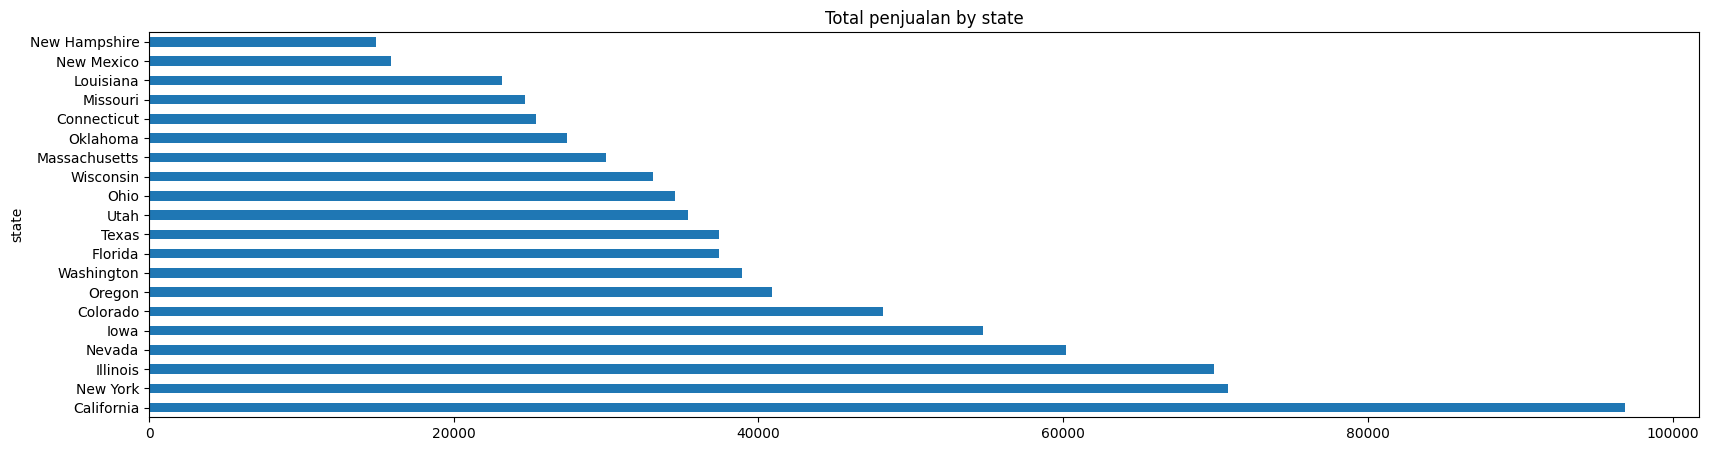

In [103]:
plt.figure(figsize=(20,5))
data.groupby(data.state).sales.sum().sort_values(ascending = False).plot(kind = 'barh')
plt.title('Total penjualan by state')
plt.show()

pada grafik diatas California adalah kota yang memiliki total penjualan terbanyak sebesar 96892 dollar, dengan produk yang paling laku adalah Columbian dengan kategori coffee dengan profit sebesar 18245 dollar 

Text(0.5, 1.0, 'Total Profit by State category and market size')

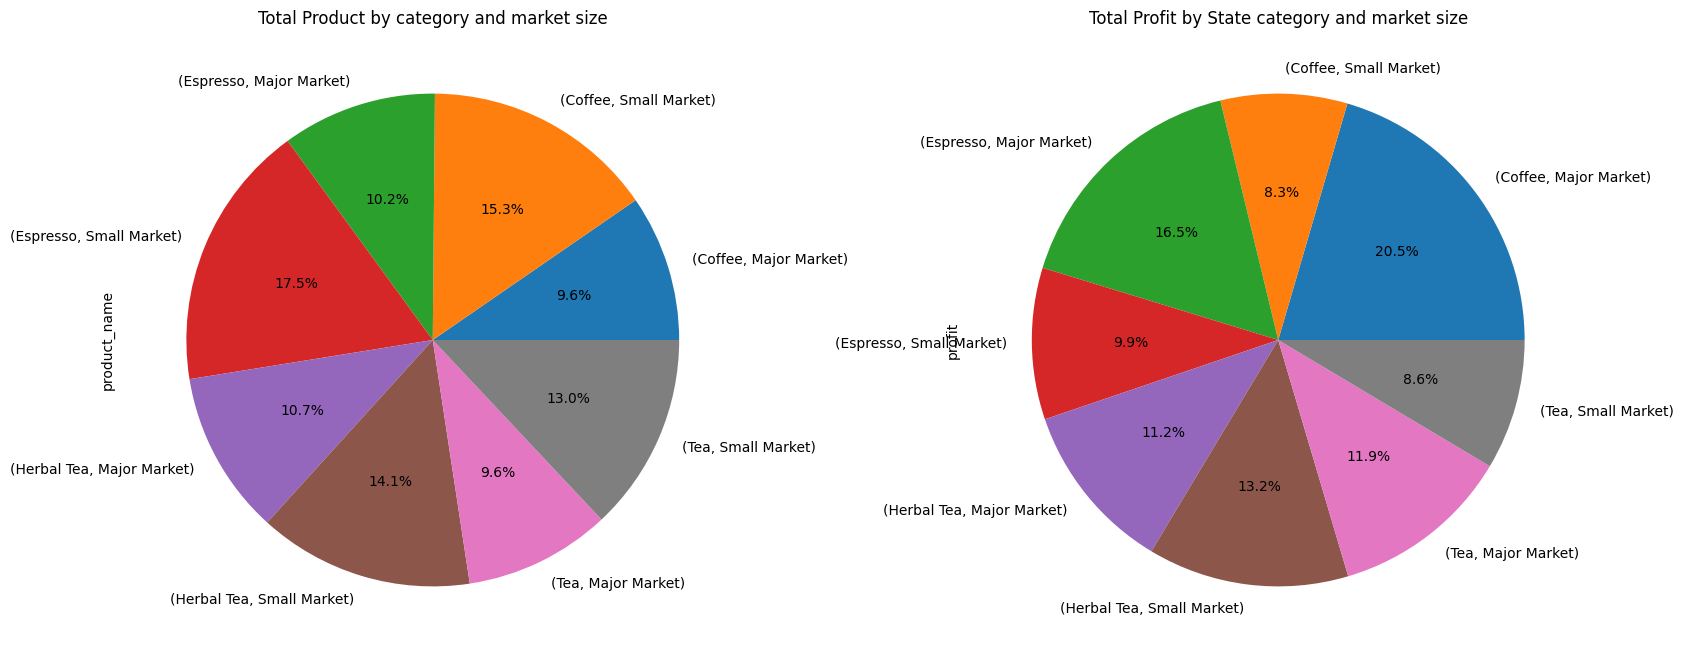

In [46]:
plt.figure(figsize=(20, 8))
plt.subplot(1, 2, 1)
data.groupby(['category','market_size'])['product_name'].count().plot(kind = 'pie', autopct='%1.1f%%')
plt.title('Total Product by category and market size')
plt.subplot(1, 2, 2)
data.groupby(['category','market_size']).profit.sum().plot(kind = 'pie', autopct='%1.1f%%')
plt.title('Total Profit by State category and market size')

Pie chart diatas adalah perbandingan jumlah produk terjual dan profit yang di dapatkan dari tiap kategori dan market size, yang menarik dari chart diatas adalah pada jumlah produk yang terjual pada kategori Coffee, Espresso dan Tea di Small market lebih banyak dibandingkan dengan Major Market, tetapi profit yang dihasilkan berbanding terbalik pada kategori Coffee, Espresso dan Tea di Major Market lebih banyak dibandingkan dengan Small Market, jadi dapat disimpulkan bahwa harga produk yang dijual pada Major Market lebih tinggi daripada Small Market meskipun jumlah produk yang terjual di Major Market tidak sebanya Small Market 

Text(0.5, 1.0, 'Total Profit Small Market by State')

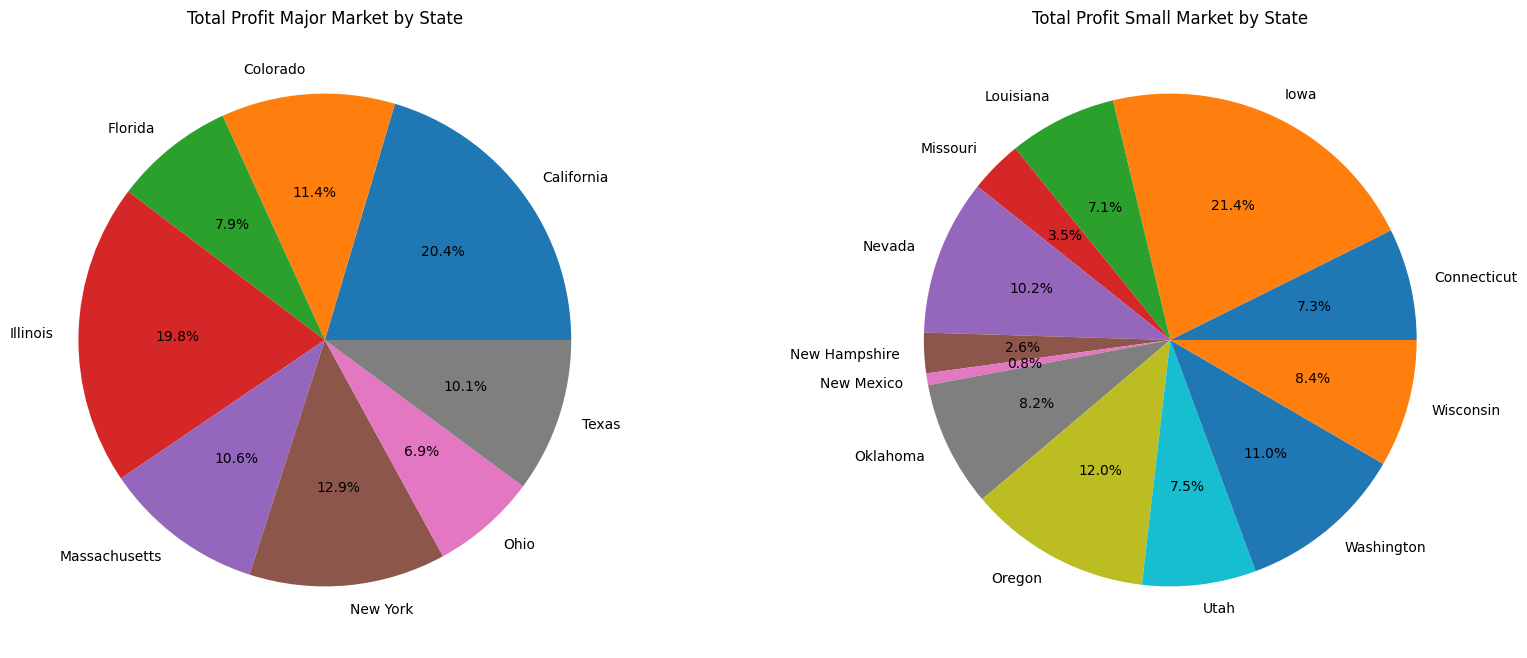

In [29]:
plt.figure(figsize=(20, 8))
plt.subplot(1, 2, 1)
plt.pie(data[data.market_size == 'Major Market'].groupby('state').profit.sum(), labels=data[data.market_size == 'Major Market'].groupby('state').profit.sum().index, autopct='%1.1f%%')
plt.title('Total Profit Major Market by State')
plt.subplot(1, 2, 2)
plt.pie(data[data.market_size == 'Small Market'].groupby('state').profit.sum(), labels=data[data.market_size == 'Small Market'].groupby('state').profit.sum().index, autopct='%1.1f%%')
plt.title('Total Profit Small Market by State')


Pie chart diatas memperlihatkan kota dengan profit terbanyak dari setiap market size, pada Major Market kota yang paling banyak menghasilkan profit adalah California sedangkan pada Small Market terdapat paa kota Iowa

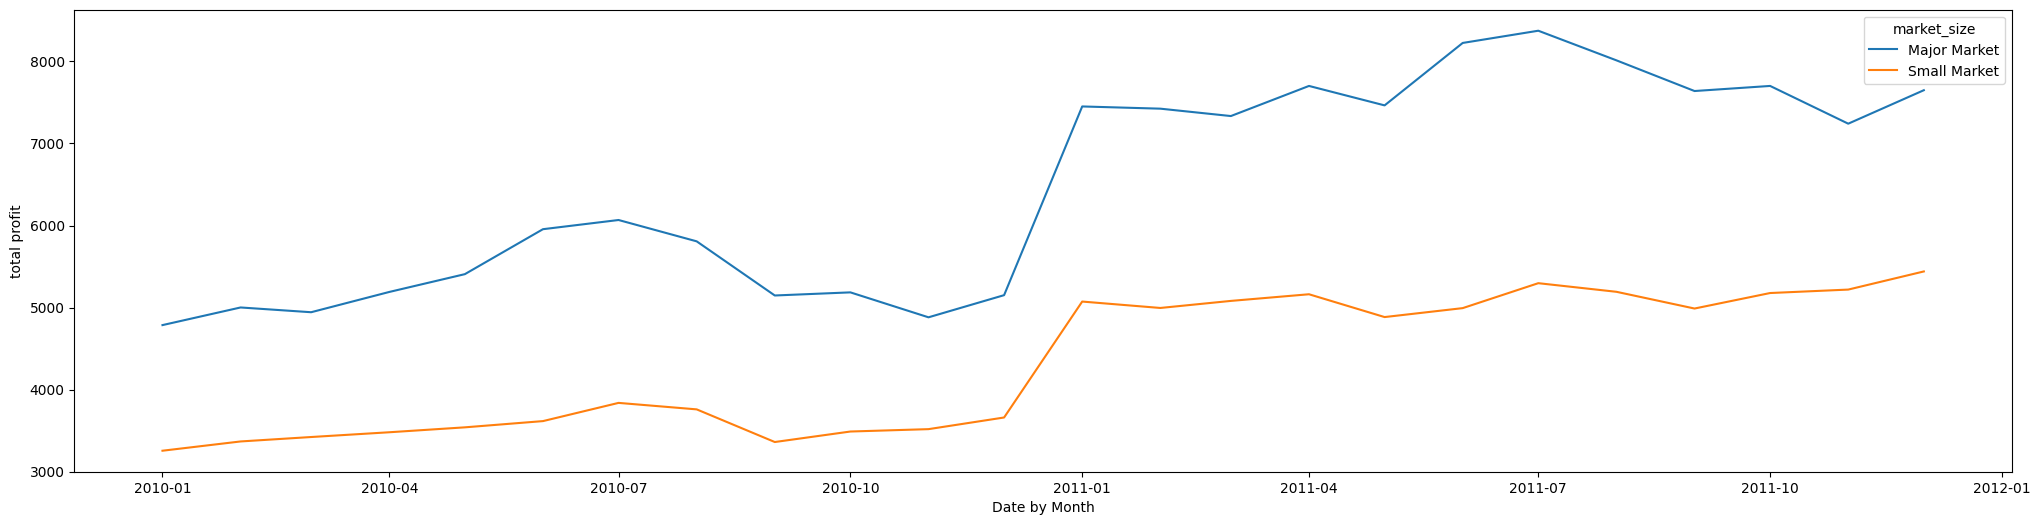

In [110]:
date_data = data.groupby(['date', 'market_size']).profit.sum().reset_index()

plt.figure(figsize=(25, 6))
sns.lineplot(data=date_data, x='date', y='profit', hue='market_size')
plt.xlabel('Date by Month')
plt.ylabel('total profit')
plt.show()

dari grafik diatas dapat diketahui bahwa profit terbesar berapada di major market pada bulan ke 7 dengan jumlah profit melebihi 8000 dollar

## Hypotesis Testing

Pada bagian ini akan dilakukan uji hipotesis untuk mengetahui **apakah rata-rata margin antara Small Market dan Major Market memiliki perbedaan yang signifikan** dengan menggunakan two sample t-test dan significant threshold sebesar 0.05.

Karena Major Market memiliki nilai margin yang lebih tinggi dari Small Market maka:

- Null Hypothesis (H0): μMajor Market = μSmall Market (Perbedaan margin major market dengan margin small market tidak signifikan)
- Alternative Hypothesis (H1): μMajor Market != μSmall Market (Perbedaan margin major market dengan margin small market signifikan)

In [33]:
significant_threshold = 0.05

In [34]:
SmallMarket = data[data.market_size == 'Small Market'].groupby(data.date).margin.sum() 
MajorMarket = data[data.market_size == 'Major Market'].groupby(data.date).margin.sum() 

Menghitung total margin dari **Small Market** dan **Major Market**

In [35]:
print(f'Rata - rata margin small market ${round(SmallMarket.mean())}')
print(f'Rata - rata margin major market ${round(MajorMarket.mean())}')

Rata - rata margin small market $8844
Rata - rata margin major market $9616


Rata-rata margin Small Market adalah 8844 (dalam dollar) dan tata-rata margin Major Market adalah 9616 (dalam dollar)

In [36]:
tstat, pvalue = stats.ttest_ind(SmallMarket, MajorMarket)

melakukan uji hipotesis two sampel t-test dengan menggunakan fungsi ttest_ind() dari scipy.stats

In [37]:
print(f'P-value {pvalue:.2f}')
print(f'T-stat {tstat:.2f}')
if pvalue <= significant_threshold:
    print('Reject the null hypothesis')
else:
    print('Fail to reject the null hypothesis')

P-value 0.00
T-stat -5.93
Reject the null hypothesis


Dari hasil uji hipotesis menggunakan **two sample t-test** dengan significant **threshold** sebesar 0.05, **p-value** yang didapatkan adalah 0.00, karena p-value lebih kecil dari significant threshold maka pada uji hipotesis ini berhasil menolak H0 karena **memiliki cukup bukti** untuk menolak hipotesis tersebut, sehingga dapat disimpulkan bahwa rata-rata margin antara Small Market dan Major Market **Significant**

In [38]:
majormarket_pop = np.random.normal(MajorMarket.mean(), MajorMarket.std(), 4000) # Membuat populasi dari Major Market sebanyak 4000 baris
smallmarket_pop = np.random.normal(SmallMarket.mean(), SmallMarket.std(), 4000) # Membuat populasi dari Small Market sebanyak 4000 baris

In [39]:
ci = stats.norm.interval(0.95, loc=MajorMarket.mean(), scale=MajorMarket.std()) # Menghitung Confidence Interval

Melakukan plotting dati populasi Major Market dan Small Market

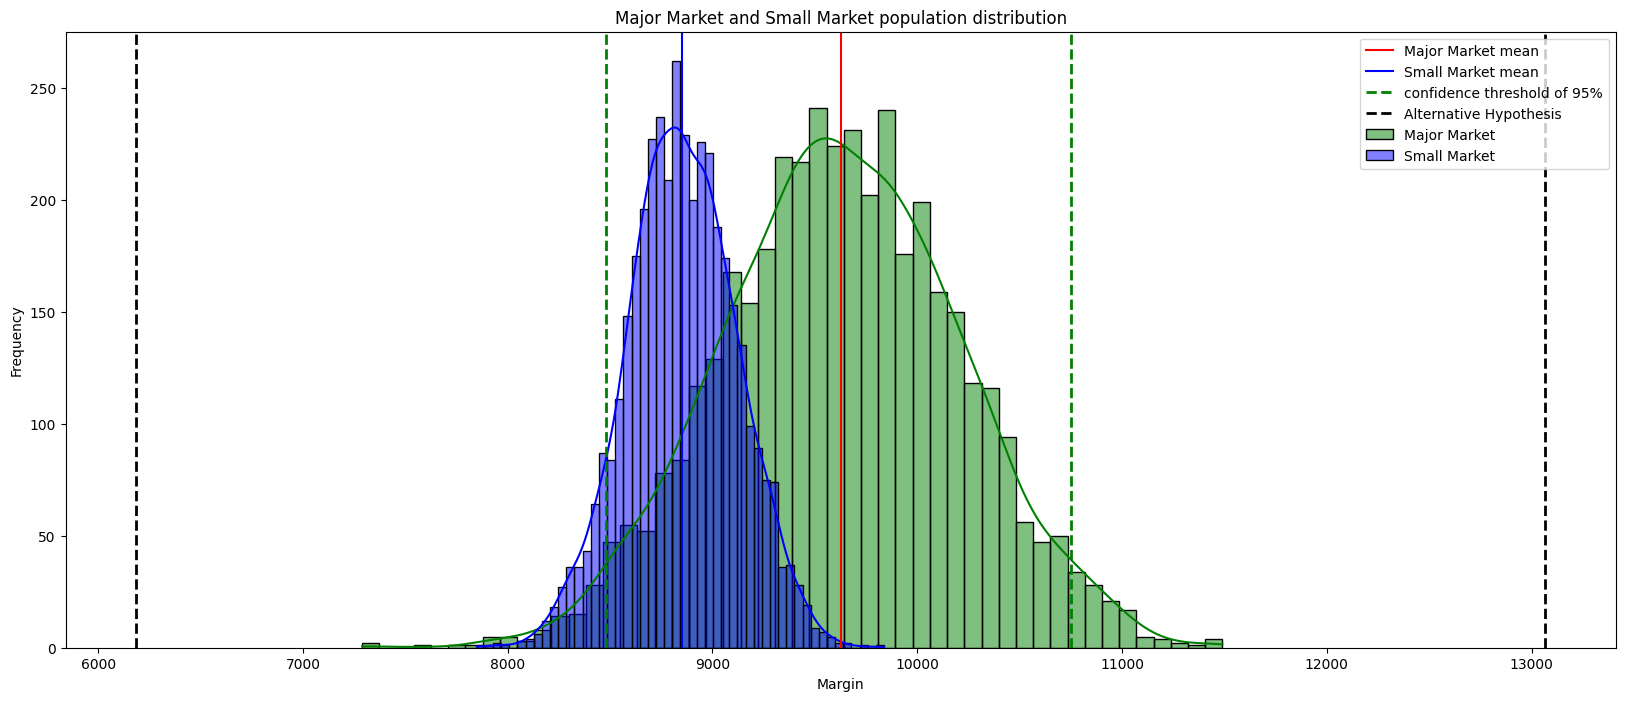

In [40]:
plt.figure(figsize=(20, 8))
sns.histplot(majormarket_pop, bins=50, label='Major Market', color='green', kde=True)
sns.histplot(smallmarket_pop, bins=50, label='Small Market', color='blue', kde=True)
plt.axvline(x=majormarket_pop.mean(), color='red', label='Major Market mean')
plt.axvline(x=smallmarket_pop.mean(), color='blue', label='Small Market mean')
plt.axvline(ci[1], color='green', linestyle='dashed', linewidth=2, label='confidence threshold of 95%')
plt.axvline(ci[0], color='green', linestyle='dashed', linewidth=2)
plt.axvline(majormarket_pop.mean()+tstat*majormarket_pop.std(), color='black', linestyle='dashed', linewidth=2, label = 'Alternative Hypothesis')
plt.axvline(majormarket_pop.mean()-tstat*majormarket_pop.std(), color='black', linestyle='dashed', linewidth=2)
plt.title('Major Market and Small Market population distribution')
plt.xlabel('Margin')
plt.ylabel('Frequency')
plt.legend()
plt.show()

plot diatas membuktikan bahwa ketika Alternatif Hypothesis (H1) berada diluar garis Confidance Treshold maka Null Hypothesis (H0) ditolak 

## Conclusions, Assumptions, Overall Analysis

Dari data exploration yang sudah dilakukan, dapat disimpulkan bahwa:
1. market size mana yang memiliki profit paling banyak?
   
   Market size yang memiliki profit paling banyak adalah **Major Market**, karena major market memiliki pendapatan lebih besar dibandingkan small market dengan total pendapatan 155736 dan rata-rata 91, sedangkan small market memiliki total pendapatan 103807 dan rata-rata 40 dimana major market memiliki rata-rata pendapatan sekitar 50 % lebih besar dari small market
2. mencari tahu kota mana yang memiliki total penjualan paling banyak
   
   Dataset ini memiliki market yang tersebar di 20 kota, dan kota yang memiliki total pendapatan tertinggi adalah kota **California** dengan total  penjualan terbanyak sebesar 96892 dollar,dengan produk yang paling laku adalah Columbian dengan kategori coffee dengan profit sebesar 18245 dollar 
 
3. Bagaimana perbandingan jumlah produk terjual dan profit yang di dapatkan dari tiap market size
   
   Produk yang dijual pada small market cenderung lebih banyak dibandingkan major market karena harga produk yang dijual cenderung lebih murah dibandingkan major market, sedangkan profit yang didapatkan major market lebih banyak dibandingkan dengan small market karena harga produk yang dijual lebih mahal dari small market.

4. kenapa market size tersebut bisa mengalami profit lebih tinggi dibanding dengan yang lainnya
   
   sesuai pada point nomor 3, major size mendapatkan profit paling tinggi dibandingkan dengan market size lainnya karena pada market ini produk Columbia coffee berkontribusi sebagai penyumbang terbesar profit market ini.  

5. kapan profit tertinggi yang dihasilkan market tersebut
   
   profit tertinggi yang dihasilkan major market berada pada bulan ke 7 tahun di 2011 dengan jumlah profil melebihi 8000 dollar.
   
6. apakah rata-rata margin antara Small Market dan Major Market memiliki perbedaan signifikan ?
   
   Karena **Major Market** memiliki nilai margin yang lebih tinggi dari **Small Market** maka:

- Null Hypothesis (**H0**): μMajor Market = μSmall Market (Perbedaan margin major market dengan margin small market **tidak signifikan**)
- Alternative Hypothesis (**H1**): μMajor Market != μSmall Market (Perbedaan margin major market dengan margin small market **signifikan**)

Dari hasil uji hipotesis menggunakan **two sample t-test** dengan significant **threshold** sebesar 0.05, **p-value** yang didapatkan adalah 0.00, karena p-value lebih kecil dari significant threshold maka pada uji hipotesis ini berhasil menolak H0 karena **memiliki cukup bukti** untuk menolak hipotesis tersebut.

Jadi dapat disimpulkan bahwa perbedaan rata-rata margin major market dengan small market **signifikan**.
   